In [110]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [111]:
df = pd.read_csv('titanic.csv')
print(f"Dataset shape: {df.shape}")
df.sample(5)

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S
425,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S


In [112]:
# Check for null/missing values
print("Null values per column:")
print("\nPercentage of null values:")
print((df.isnull().sum() / len(df)) * 100)


Null values per column:

Percentage of null values:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [113]:
# Statistical summary (describe)
print("Statistical Summary:")
df.describe()



Statistical Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
# Check for duplicated rows
duplicated_count = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicated_count}")
if duplicated_count > 0:
    print("\nDuplicated rows:")
    print(df[df.duplicated()])
else:
    print("No duplicated rows found!")


Number of duplicated rows: 0
No duplicated rows found!


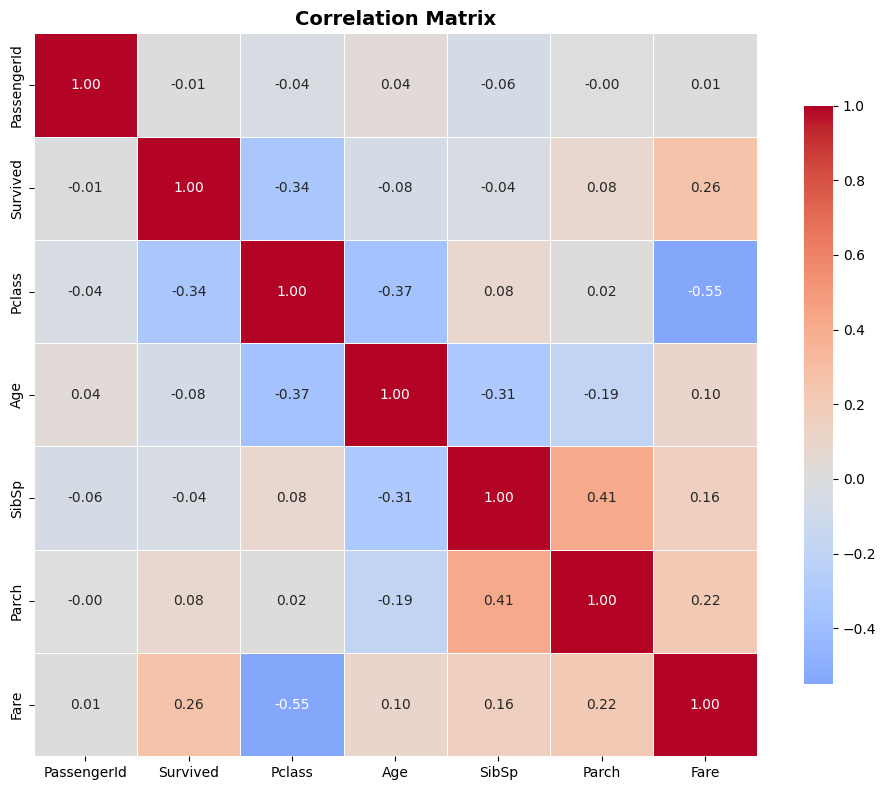

In [115]:
# Correlation Matrix
correlation = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [116]:
# Show unique values in categorical columns
print("Unique values in categorical columns:")
print("="*60)

categorical_cols = ['Sex', 'Embarked']

for col in categorical_cols:
    if col in df.columns:
        unique_vals = df[col].unique()
        value_counts = df[col].value_counts().sort_index()
        print(f"\n{col}:")
        print(f"  Unique values: {unique_vals}")
        print(f"  Count of each value:")
        for val, count in value_counts.items():
            print(f"    {val}: {count} ({count/len(df)*100:.1f}%)")
        print(f"  Null values: {df[col].isnull().sum()}")


Unique values in categorical columns:

Sex:
  Unique values: ['male' 'female']
  Count of each value:
    female: 314 (35.2%)
    male: 577 (64.8%)
  Null values: 0

Embarked:
  Unique values: ['S' 'C' 'Q' nan]
  Count of each value:
    C: 168 (18.9%)
    Q: 77 (8.6%)
    S: 644 (72.3%)
  Null values: 2


In [117]:
# Create a copy for encoding
df_encoded = df.copy()

In [118]:
# SEX - Label Encoding
# Binary variable: male/female → 0/1

df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
print("Sex encoded using Label Encoding")
print("  male → 0, female → 1")
print(f"  Encoded values: {df_encoded['Sex'].unique()}")


Sex encoded using Label Encoding
  male → 0, female → 1
  Encoded values: [0 1]


In [119]:
# EMBARKED - K-1 One-Hot Encoding
# Fill null values first
df_encoded['Embarked'] = df_encoded['Embarked'].fillna('S')

# Create one-hot encoding (k-1: drop one column to avoid multicollinearity)
embarked_dummies = pd.get_dummies(df_encoded['Embarked'], prefix='Embarked', drop_first=True)

# Add to dataframe and drop original
df_encoded = pd.concat([df_encoded, embarked_dummies], axis=1)
df_encoded = df_encoded.drop('Embarked', axis=1)

print("Embarked encoded using K-1 one-hot encoding")
print(f"New columns: {list(embarked_dummies.columns)}")


Embarked encoded using K-1 one-hot encoding
New columns: ['Embarked_Q', 'Embarked_S']


In [120]:
# Update original dataframe (df) with encoded values
# Copy Sex encoding
df['Sex'] = df_encoded['Sex'].values

# Copy Embarked encoding (one-hot columns) - convert to int first
embarked_cols = [col for col in df_encoded.columns if 'Embarked' in col]
for col in embarked_cols:
    df[col] = df_encoded[col].astype(int).values

In [121]:
# Drop original Embarked column from df if it exists
if 'Embarked' in df.columns:
    df = df.drop('Embarked', axis=1)

print("Updated original dataframe (df) with encoded values")
print(f"df shape: {df.shape}")
print(f"df columns: {list(df.columns)}")


Updated original dataframe (df) with encoded values
df shape: (891, 13)
df columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S']


In [122]:
# Drop unnecessary columns for logistic regression
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare']
#cabin-many nulls
#fare-highly correlated with pclass
#ticket-mostly unique identifiers
#name-text data
#passengerid-unique identifier

# Only drop columns that exist
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

print(f"Dropping columns: {columns_to_drop}")
df = df.drop(columns=columns_to_drop)

print(f"\nNew shape: {df.shape}")
print(f"Remaining columns: {list(df.columns)}")
print("\nSample of cleaned data:")
df.sample(5)

Dropping columns: ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare']

New shape: (891, 8)
Remaining columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']

Sample of cleaned data:


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S
254,0,3,1,41.0,0,2,0,1
884,0,3,0,25.0,0,0,0,1
777,1,3,1,5.0,0,0,0,1
436,0,3,1,21.0,2,2,0,1
635,1,2,1,28.0,0,0,0,1


In [123]:
# Handle missing values in Age (fill with median)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Separate features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Convert to numpy arrays
X = X.values
y = y.values

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nFeatures: {list(df.drop('Survived', axis=1).columns)}")
print(f"\nMissing values in X: {np.isnan(X).sum()}")
print(f"Missing values in y: {np.isnan(y).sum()}")


X shape: (891, 7)
y shape: (891,)

Features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']

Missing values in X: 0
Missing values in y: 0


In [124]:
def plot_gradient_descent(model):
    cost_history = model.get_cost_history()
    
    if len(cost_history) == 0:
        print("Error: Model has not been trained yet. Call model.fit() first.")
        return
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(cost_history) + 1), cost_history, 'b-', linewidth=2, label='Cost')
    plt.xlabel('Iteration', fontsize=12, fontweight='bold')
    plt.ylabel('Cost', fontsize=12, fontweight='bold')
    plt.title('Gradient Descent Convergence', fontsize=16, fontweight='bold')
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*50)
    print("CONVERGENCE STATISTICS:")
    print("="*50)
    print(f"Initial cost: {cost_history[0]:.6f}")
    print(f"Final cost: {cost_history[-1]:.6f}")
    print(f"Cost reduction: {cost_history[0] - cost_history[-1]:.6f}")
    print(f"Percentage reduction: {((cost_history[0] - cost_history[-1]) / cost_history[0] * 100):.2f}%")
    print(f"Total iterations: {len(cost_history)}")
    print("="*50)

print("Gradient descent plotting function created!")


Gradient descent plotting function created!


In [125]:
class LogisticRegression:
    
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost_function(self, y, y_pred):
        m = len(y)
        cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost
    
    def fit(self, X, y):
        m, n = X.shape
        
        self.weights = np.zeros((n, 1))
        self.bias = 0
        
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        
        for i in range(self.iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            
            cost = self.cost_function(y, y_pred)
            self.cost_history.append(cost)
            
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            if (i + 1) % 100 == 0:
                print(f"Iteration {i+1}/{self.iterations}, Cost: {cost:.4f}")
        
        print(f"\nTraining complete! Final cost: {self.cost_history[-1]:.4f}")
    
    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def predict(self, X, threshold=0.4):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
    def get_cost_history(self):
        return self.cost_history


In [126]:
# Train-Test Split (manual implementation)
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    n = len(X)
    indices = np.arange(n)
    np.random.shuffle(indices)
    
    split_idx = int(n * (1 - test_size))
    
    train_idx = indices[:split_idx]
    test_idx = indices[split_idx:]
    
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    
    return X_train, X_test, y_train, y_test

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test Split Complete!")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Train features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
    

Train-Test Split Complete!
Training set: 712 samples
Test set: 179 samples
Train features shape: (712, 7)
Test features shape: (179, 7)


In [127]:
# Feature Scaling (Standardization - Z-score normalization)
# Only scale continuous features: Age, SibSp, Parch
# Don't scale: Pclass (ordinal), Sex (binary), Embarked_Q, Embarked_S (one-hot)

# Features order: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']
# Indices:          [0,       1,     2,     3,       4,       5,           6]
# Scale indices: Age=2, SibSp=3, Parch=4

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scale only continuous features (Age, SibSp, Parch)
scale_indices = [2, 3, 4]  # Age, SibSp, Parch

for idx in scale_indices:
    mean = np.mean(X_train[:, idx])
    std = np.std(X_train[:, idx])
    
    if std == 0:
        std = 1
    
    X_train_scaled[:, idx] = (X_train[:, idx] - mean) / std
    X_test_scaled[:, idx] = (X_test[:, idx] - mean) / std

print("Feature Scaling Complete!")
print("Scaled features: Age, SibSp, Parch")
print("Unscaled features: Pclass, Sex, Embarked_Q, Embarked_S")
print(f"\nScaled training data stats (Age, SibSp, Parch):")
print(f"  Mean: {np.mean(X_train_scaled[:, scale_indices], axis=0)}")
print(f"  Std: {np.std(X_train_scaled[:, scale_indices], axis=0)}")


Feature Scaling Complete!
Scaled features: Age, SibSp, Parch
Unscaled features: Pclass, Sex, Embarked_Q, Embarked_S

Scaled training data stats (Age, SibSp, Parch):
  Mean: [ 1.54682758e-16 -9.97953281e-18  1.99590656e-17]
  Std: [1. 1. 1.]


In [128]:
model = LogisticRegression(learning_rate=0.001, iterations=60000)
model.fit(X_train_scaled, y_train)

Iteration 100/60000, Cost: 0.6768
Iteration 200/60000, Cost: 0.6648


Iteration 300/60000, Cost: 0.6557
Iteration 400/60000, Cost: 0.6488
Iteration 500/60000, Cost: 0.6434
Iteration 600/60000, Cost: 0.6389
Iteration 700/60000, Cost: 0.6351
Iteration 800/60000, Cost: 0.6319
Iteration 900/60000, Cost: 0.6289
Iteration 1000/60000, Cost: 0.6263
Iteration 1100/60000, Cost: 0.6238
Iteration 1200/60000, Cost: 0.6215
Iteration 1300/60000, Cost: 0.6193
Iteration 1400/60000, Cost: 0.6172
Iteration 1500/60000, Cost: 0.6152
Iteration 1600/60000, Cost: 0.6132
Iteration 1700/60000, Cost: 0.6113
Iteration 1800/60000, Cost: 0.6094
Iteration 1900/60000, Cost: 0.6075
Iteration 2000/60000, Cost: 0.6057
Iteration 2100/60000, Cost: 0.6039
Iteration 2200/60000, Cost: 0.6022
Iteration 2300/60000, Cost: 0.6005
Iteration 2400/60000, Cost: 0.5988
Iteration 2500/60000, Cost: 0.5971
Iteration 2600/60000, Cost: 0.5955
Iteration 2700/60000, Cost: 0.5939
Iteration 2800/60000, Cost: 0.5923
Iteration 2900/60000, Cost: 0.5908
Iteration 3000/60000, Cost: 0.5892
Iteration 3100/60000, Cost:

In [129]:
# PCA (Principal Component Analysis) - Reduce dimensions by 1
# From 7 features to 6 principal components

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        covariance_matrix = np.cov(X_centered.T)
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        self.components = eigenvectors[:, :self.n_components]
        
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio = eigenvalues[:self.n_components] / total_variance
    
    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [130]:
pca = PCA(n_components=3) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

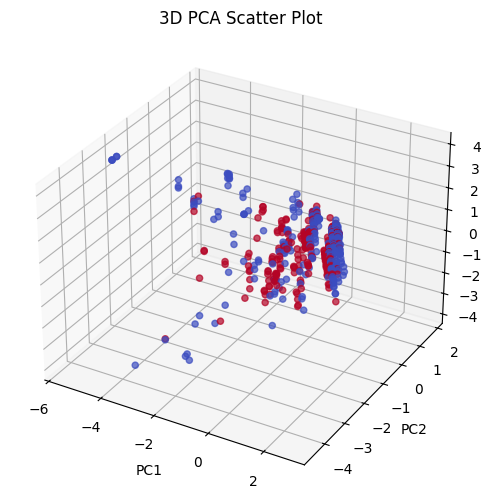

In [131]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_train_pca[:, 0], 
    X_train_pca[:, 1], 
    X_train_pca[:, 2], 
    c=y_train, cmap='coolwarm', alpha=0.7
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Scatter Plot")
plt.show()

In [132]:
# PCA (Principal Component Analysis) - Reduce dimensions by 1
# From 7 features to 6 principal components

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        covariance_matrix = np.cov(X_centered.T)
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        self.components = eigenvectors[:, :self.n_components]
        
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio = eigenvalues[:self.n_components] / total_variance
    
    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

PCA DIMENSION REDUCTION:
Original dimensions: 7
Reduced dimensions: 3
Reduction: 4 dimension(s)

Training data shape: (712, 3)
Test data shape: (179, 3)

Explained Variance Ratio per Component:
  PC1: 0.3840 (38.40%)
  PC2: 0.2378 (23.78%)
  PC3: 0.1420 (14.20%)

Total Variance Explained: 0.7638 (76.38%)


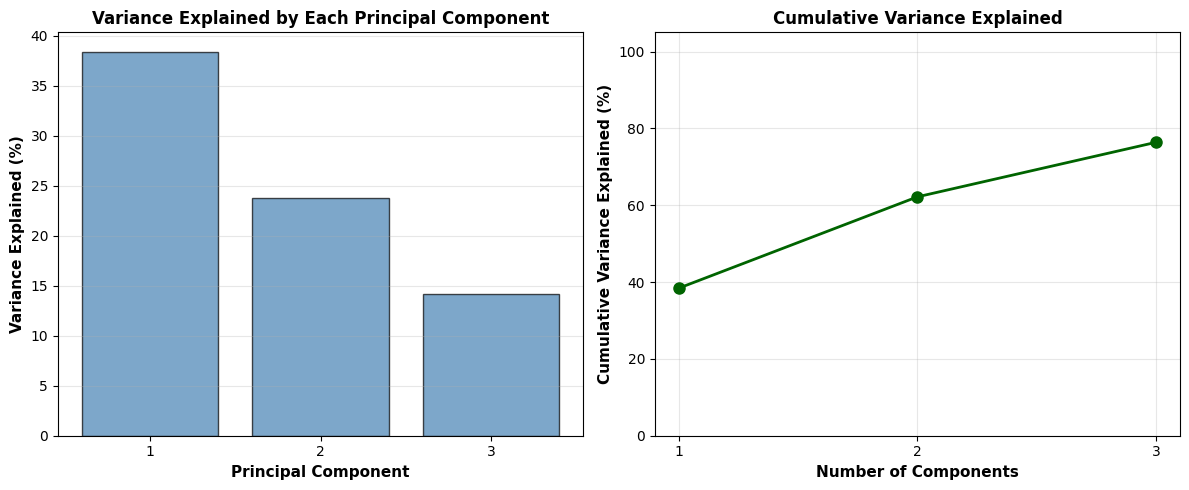

In [133]:

print("="*60)
print("PCA DIMENSION REDUCTION:")
print("="*60)
print(f"Original dimensions: {X_train_scaled.shape[1]}")
print(f"Reduced dimensions: {X_train_pca.shape[1]}")
print(f"Reduction: {X_train_scaled.shape[1] - X_train_pca.shape[1]} dimension(s)")
print(f"\nTraining data shape: {X_train_pca.shape}")
print(f"Test data shape: {X_test_pca.shape}")

print(f"\nExplained Variance Ratio per Component:")
for i, var in enumerate(pca.explained_variance_ratio):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")

total_variance = np.sum(pca.explained_variance_ratio)
print(f"\nTotal Variance Explained: {total_variance:.4f} ({total_variance*100:.2f}%)")
print("="*60)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(pca.explained_variance_ratio) + 1), pca.explained_variance_ratio * 100, 
        color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Principal Component', fontsize=11, fontweight='bold')
plt.ylabel('Variance Explained (%)', fontsize=11, fontweight='bold')
plt.title('Variance Explained by Each Principal Component', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(range(1, len(pca.explained_variance_ratio) + 1))

plt.subplot(1, 2, 2)
cumulative_variance = np.cumsum(pca.explained_variance_ratio) * 100
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         marker='o', linewidth=2, markersize=8, color='darkgreen')
plt.xlabel('Number of Components', fontsize=11, fontweight='bold')
plt.ylabel('Cumulative Variance Explained (%)', fontsize=11, fontweight='bold')
plt.title('Cumulative Variance Explained', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.ylim([0, 105])

plt.tight_layout()
plt.show()

In [134]:
# Create and train the model on scaled training data
model_PCA = LogisticRegression(learning_rate=0.001, iterations=60000)
model_PCA.fit(X_train_pca, y_train)


Iteration 100/60000, Cost: 0.6910
Iteration 200/60000, Cost: 0.6890
Iteration 300/60000, Cost: 0.6871
Iteration 400/60000, Cost: 0.6852
Iteration 500/60000, Cost: 0.6834
Iteration 600/60000, Cost: 0.6818
Iteration 700/60000, Cost: 0.6801
Iteration 800/60000, Cost: 0.6786
Iteration 900/60000, Cost: 0.6771
Iteration 1000/60000, Cost: 0.6757
Iteration 1100/60000, Cost: 0.6744
Iteration 1200/60000, Cost: 0.6731
Iteration 1300/60000, Cost: 0.6719
Iteration 1400/60000, Cost: 0.6708
Iteration 1500/60000, Cost: 0.6697
Iteration 1600/60000, Cost: 0.6686
Iteration 1700/60000, Cost: 0.6676
Iteration 1800/60000, Cost: 0.6666
Iteration 1900/60000, Cost: 0.6657
Iteration 2000/60000, Cost: 0.6648
Iteration 2100/60000, Cost: 0.6640
Iteration 2200/60000, Cost: 0.6632
Iteration 2300/60000, Cost: 0.6624
Iteration 2400/60000, Cost: 0.6617
Iteration 2500/60000, Cost: 0.6610
Iteration 2600/60000, Cost: 0.6603
Iteration 2700/60000, Cost: 0.6596
Iteration 2800/60000, Cost: 0.6590
Iteration 2900/60000, Cost: 0

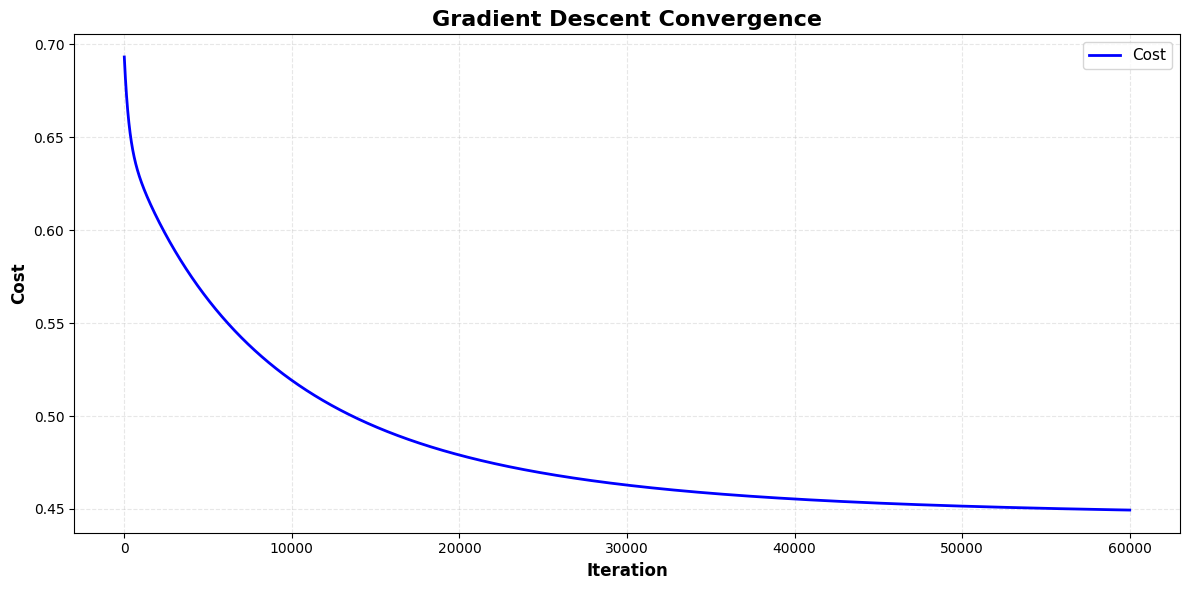


CONVERGENCE STATISTICS:
Initial cost: 0.693147
Final cost: 0.449392
Cost reduction: 0.243755
Percentage reduction: 35.17%
Total iterations: 60000


In [135]:
# Plot Gradient Descent Convergence
plot_gradient_descent(model)


In [136]:
# Make predictions on scaled test set
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)

print("Test Set Predictions Summary:")
print("="*50)
print(f"Total test samples: {len(y_test)}")
print(f"Predicted to survive (1): {np.sum(y_pred == 1)}")
print(f"Predicted to not survive (0): {np.sum(y_pred == 0)}")
print(f"\nActual survival rate: {np.mean(y_test):.2%}")
print(f"Predicted survival rate: {np.mean(y_pred):.2%}")
print(f"\nSample predictions (first 10):")
print(f"Actual:    {y_test[:10]}")
print(f"Predicted: {y_pred[:10].flatten()}")
print(f"Probability: {y_proba[:10].flatten()}")


Test Set Predictions Summary:
Total test samples: 179
Predicted to survive (1): 75
Predicted to not survive (0): 104

Actual survival rate: 36.31%
Predicted survival rate: 41.90%

Sample predictions (first 10):
Actual:    [0 0 1 1 1 0 1 1 0 0]
Predicted: [0 0 0 1 1 0 1 0 0 0]
Probability: [0.28322903 0.08374124 0.26939903 0.5809871  0.79871121 0.08335848
 0.8274723  0.32375976 0.26183126 0.26306509]


In [137]:
# Calculate accuracy and metrics on test set
accuracy = np.mean(y_pred.flatten() == y_test)
print("="*50)
print("MODEL PERFORMANCE (Test Set):")
print("="*50)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Calculate confusion matrix components
tp = np.sum((y_pred.flatten() == 1) & (y_test == 1))
tn = np.sum((y_pred.flatten() == 0) & (y_test == 0))
fp = np.sum((y_pred.flatten() == 1) & (y_test == 0))
fn = np.sum((y_pred.flatten() == 0) & (y_test == 1))

print(f"\nConfusion Matrix:")
print(f"True Positives (TP):  {tp}")
print(f"True Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nPrecision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1_score:.4f}")
print("="*50)

MODEL PERFORMANCE (Test Set):
Accuracy: 0.7877 (78.77%)

Confusion Matrix:
True Positives (TP):  51
True Negatives (TN):  90
False Positives (FP): 24
False Negatives (FN): 14

Precision: 0.6800
Recall:    0.7846
F1-Score:  0.7286


In [138]:
model_PCA=LogisticRegression(learning_rate=0.001, iterations=60000)
model_PCA.fit(X_train_pca, y_train)

Iteration 100/60000, Cost: 0.6910
Iteration 200/60000, Cost: 0.6890
Iteration 300/60000, Cost: 0.6871
Iteration 400/60000, Cost: 0.6852
Iteration 500/60000, Cost: 0.6834
Iteration 600/60000, Cost: 0.6818
Iteration 700/60000, Cost: 0.6801
Iteration 800/60000, Cost: 0.6786
Iteration 900/60000, Cost: 0.6771
Iteration 1000/60000, Cost: 0.6757
Iteration 1100/60000, Cost: 0.6744
Iteration 1200/60000, Cost: 0.6731
Iteration 1300/60000, Cost: 0.6719
Iteration 1400/60000, Cost: 0.6708


Iteration 1500/60000, Cost: 0.6697
Iteration 1600/60000, Cost: 0.6686
Iteration 1700/60000, Cost: 0.6676
Iteration 1800/60000, Cost: 0.6666
Iteration 1900/60000, Cost: 0.6657
Iteration 2000/60000, Cost: 0.6648
Iteration 2100/60000, Cost: 0.6640
Iteration 2200/60000, Cost: 0.6632
Iteration 2300/60000, Cost: 0.6624
Iteration 2400/60000, Cost: 0.6617
Iteration 2500/60000, Cost: 0.6610
Iteration 2600/60000, Cost: 0.6603
Iteration 2700/60000, Cost: 0.6596
Iteration 2800/60000, Cost: 0.6590
Iteration 2900/60000, Cost: 0.6584
Iteration 3000/60000, Cost: 0.6579
Iteration 3100/60000, Cost: 0.6573
Iteration 3200/60000, Cost: 0.6568
Iteration 3300/60000, Cost: 0.6563
Iteration 3400/60000, Cost: 0.6558
Iteration 3500/60000, Cost: 0.6554
Iteration 3600/60000, Cost: 0.6549
Iteration 3700/60000, Cost: 0.6545
Iteration 3800/60000, Cost: 0.6541
Iteration 3900/60000, Cost: 0.6537
Iteration 4000/60000, Cost: 0.6534
Iteration 4100/60000, Cost: 0.6530
Iteration 4200/60000, Cost: 0.6527
Iteration 4300/60000

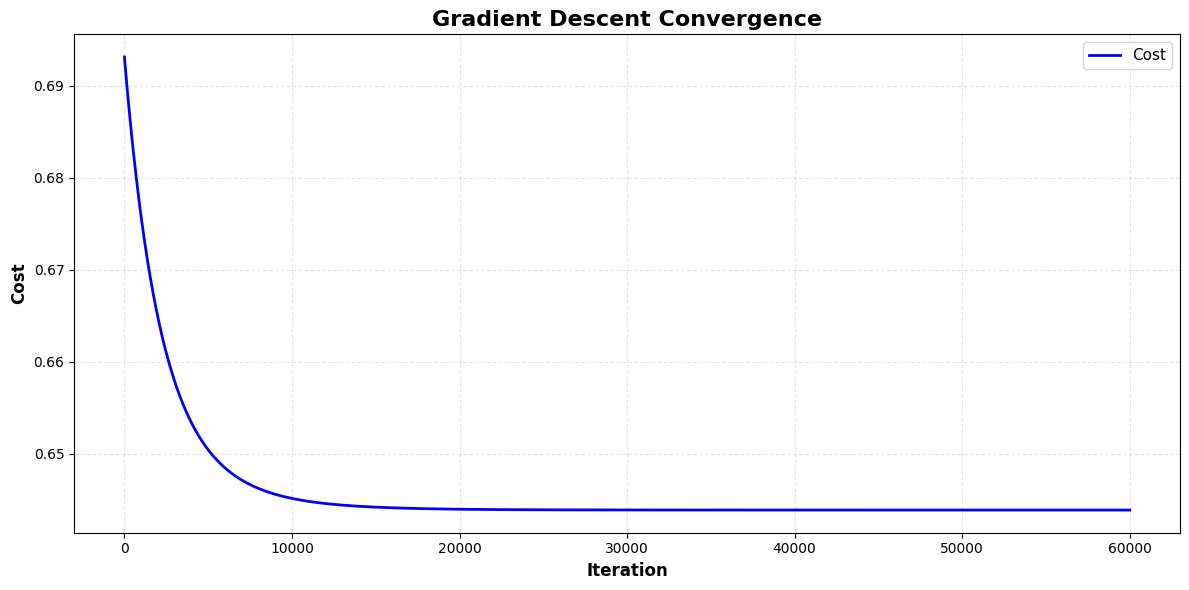


CONVERGENCE STATISTICS:
Initial cost: 0.693147
Final cost: 0.643862
Cost reduction: 0.049285
Percentage reduction: 7.11%
Total iterations: 60000


In [139]:
plot_gradient_descent(model_PCA)

In [140]:
y_pred_pca = model_PCA.predict(X_test_pca)
y_proba_pca = model_PCA.predict_proba(X_test_pca)

# 4. Print Results (Fixed the print statement indexing error as well)
print("\nTest Set Predictions Summary:")
print("="*50)
print(f"Total test samples: {len(y_test)}")
print(f"Predicted to survive (1): {np.sum(y_pred_pca == 1)}")
print(f"Predicted to not survive (0): {np.sum(y_pred_pca == 0)}")
print(f"\nActual survival rate: {np.mean(y_test):.2%}")
print(f"Predicted survival rate: {np.mean(y_pred_pca):.2%}")
print(f"\nSample predictions (first 10):")
print(f"Actual:    {y_test[:10]}")
print(f"Predicted: {y_pred_pca[:10].flatten()}")
# Fixed: Use flatten() instead of [:, 1] because your custom class returns shape (m, 1)
print(f"Probability: {y_proba_pca[:10].flatten()}")


Test Set Predictions Summary:
Total test samples: 179
Predicted to survive (1): 41
Predicted to not survive (0): 138

Actual survival rate: 36.31%
Predicted survival rate: 22.91%

Sample predictions (first 10):
Actual:    [0 0 1 1 1 0 1 1 0 0]
Predicted: [0 0 1 1 1 0 0 0 0 1]
Probability: [0.35273345 0.35557926 0.4053397  0.65209224 0.42584037 0.34545974
 0.39972487 0.24199632 0.36034104 0.54293385]


In [143]:
# Calculate accuracy and metrics on test set
y_pred = model_PCA.predict(X_test_pca)
y_proba = model_PCA.predict_proba(X_test_pca)

accuracy = np.mean(y_pred.flatten() == y_test)
print("="*50)
print("MODEL PERFORMANCE (Test Set):")
print("="*50)
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Calculate confusion matrix components
tp = np.sum((y_pred.flatten() == 1) & (y_test == 1))
tn = np.sum((y_pred.flatten() == 0) & (y_test == 0))
fp = np.sum((y_pred.flatten() == 1) & (y_test == 0))
fn = np.sum((y_pred.flatten() == 0) & (y_test == 1))

print(f"\nConfusion Matrix:")
print(f"True Positives (TP):  {tp}")
print(f"True Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nPrecision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1_score:.4f}")
print("="*50)

MODEL PERFORMANCE (Test Set):
Accuracy: 0.6648 (66.48%)

Confusion Matrix:
True Positives (TP):  23
True Negatives (TN):  96
False Positives (FP): 18
False Negatives (FN): 42

Precision: 0.5610
Recall:    0.3538
F1-Score:  0.4340
